# Data Wrangling with Python: U.S Census Data

**Alfikri Ramadhan - [LinkedIn](https://www.linkedin.com/in/alfikri-ramadhan/)**

<img src="figs/andy_productivity.jpg" width="300"/>

## About The Project
***
Frequently when we work with data, we encounter unstructured and/or messy data. Messy data can take a variety of forms. This could mean any of the following:

- The columns are mislabeled or do not have variable names.
- The dataset contains nonsensical data.
- Variables are stored in both the columns and rows.

While the data may be messy, it is still extremely informative. We need to clean, transform, and sometimes manipulate the data structure to gain any insights. This process is often called **data wrangling**.

Having clean data will improves data quality. Ultimately, this will allow us to make better data-driven decision-making for business.

The aim of this project is to demonstrate some method for cleaning data. After the data is cleaned, it will be analyzed through visualization to find interesting insight. 

## The Dataset
***
The dataset is a dummy dataset obtained from Codecademy Data Scientist Career Path.

We have 10 csv files, each file have different rows and with the same columns.

<img src="figs/dataset_collection.png" width="700"/>

## Data Loading and Inspecting
***
Instead of importing the dataset one-by-one, we can easily import and union all the dataset using `glob`

In [1]:
# import libraries
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# load datasets
census_files = glob.glob("datasets/states*.csv")
df_list = []
for filename in census_files:
    data = pd.read_csv(filename)
    df_list.append(data)

us_census = pd.concat(df_list).reset_index()

In [33]:
# see sample of data
us_census.head()

,index,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093M_2489527F
1,1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160M_349215F
2,2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088M_3342840F
3,3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63",1451913M_1506295F
4,4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78",19087135M_19334329F


In [4]:
# check columns of the dataset
us_census.columns

Index(['index', 'Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White',
       'Black', 'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')

In [5]:
# quick overview of data
us_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       60 non-null     int64 
 1   Unnamed: 0  60 non-null     int64 
 2   State       60 non-null     object
 3   TotalPop    60 non-null     int64 
 4   Hispanic    60 non-null     object
 5   White       60 non-null     object
 6   Black       60 non-null     object
 7   Native      60 non-null     object
 8   Asian       60 non-null     object
 9   Pacific     55 non-null     object
 10  Income      60 non-null     object
 11  GenderPop   60 non-null     object
dtypes: int64(3), object(9)
memory usage: 5.8+ KB


By glancing at the data sample and its data types, we can see some messiness in our data, some of them:
- Variable `Unnamed: 0` seems doesn't add any information to our data.
- The race variable (`Hispanic`, `White`, `Black`, etc.) shows percentage yet the data types is **object**.
- `Income` appears to shows continous numbers, yet the data type is **object**.
- Variable `GenderPop` shows the population for male and female. It would be better to separate this column to each gender population.

Before cleaning and transforming the dataset, let's see if our data has missing values and duplicated values

In [6]:
us_census.isnull().sum()

index         0
Unnamed: 0    0
State         0
TotalPop      0
Hispanic      0
White         0
Black         0
Native        0
Asian         0
Pacific       5
Income        0
GenderPop     0
dtype: int64

In [7]:
us_census.duplicated().value_counts()

False    60
dtype: int64

## Cleaning the Dataset

In [8]:
us_census_raw = us_census.copy()

### 1. Remove unused variable

In [9]:
# remove the `Unnamed: 0` column
us_census = us_census.drop(['index','Unnamed: 0'], axis=1)
us_census.head(3)

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093M_2489527F
1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160M_349215F
2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088M_3342840F


### 2. Change the races and income variable to integer data type

To change the races and income variable to numeric data type, first we must remove the symbols from its data and leave only numbers. After that, we can change its data type to integer/float.

In [10]:
us_census.Income = us_census.Income.replace('[,\$]', '', regex=True)
us_census.Income = pd.to_numeric(us_census.Income)
us_census.head(3)

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2341093M_2489527F
1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,384160M_349215F
2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3299088M_3342840F


In [11]:
race_column = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']
for col in race_column:
    us_census[col] = us_census[col].replace('[,\%]', '', regex=True)
    us_census[col] = pd.to_numeric(us_census[col])
us_census.head(3)

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,2341093M_2489527F
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160M_349215F
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088M_3342840F


In [12]:
print(us_census.dtypes)

State         object
TotalPop       int64
Hispanic     float64
White        float64
Black        float64
Native       float64
Asian        float64
Pacific      float64
Income       float64
GenderPop     object
dtype: object


### 3. Separate `GenderPop` column into two columns, the `MalePop` column and the `FemalePop` column

In [13]:
gender_split = us_census.GenderPop.str.split("_")
us_census['MalePop'] = gender_split.str.get(0)
us_census['FemalePop'] = gender_split.str.get(1)
us_census.head(3)

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,MalePop,FemalePop
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,2341093M_2489527F,2341093M,2489527F
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160M_349215F,384160M,349215F
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088M_3342840F,3299088M,3342840F


Let's also convert these separated columns into numeric data type.

In [14]:
# remove the M and F letters
us_census.MalePop = us_census.MalePop.str[0:-1]
us_census.FemalePop = us_census.FemalePop.str[0:-1]

# convert to numeric
us_census.MalePop = pd.to_numeric(us_census.MalePop)
us_census.FemalePop = pd.to_numeric(us_census.FemalePop)

Finally, let's drop the `GenderPop` column.

In [15]:
us_census = us_census.drop('GenderPop', axis=1)
us_census.head(3)

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,MalePop,FemalePop
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,2341093,2489527.0
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160,349215.0
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088,3342840.0


In [16]:
us_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   State      60 non-null     object 
 1   TotalPop   60 non-null     int64  
 2   Hispanic   60 non-null     float64
 3   White      60 non-null     float64
 4   Black      60 non-null     float64
 5   Native     60 non-null     float64
 6   Asian      60 non-null     float64
 7   Pacific    55 non-null     float64
 8   Income     60 non-null     float64
 9   MalePop    60 non-null     int64  
 10  FemalePop  57 non-null     float64
dtypes: float64(8), int64(2), object(1)
memory usage: 5.3+ KB


Now the races and income columns have correct data type. We also separate the gender population into male and female and convert its data types to numeric.

### 4. Handling Missing Values

In [17]:
us_census.isnull().sum()

State        0
TotalPop     0
Hispanic     0
White        0
Black        0
Native       0
Asian        0
Pacific      5
Income       0
MalePop      0
FemalePop    3
dtype: int64

Previously, only `Pacific` variable has missing values. Since we have transformed previous genderpop column to separate columns, it seems like some data for `FemalePop` are also missing.

First, let's handle missing value for `Pacific` race column. We will fill the missing values with average value of the column.

In [18]:
us_census.Pacific = us_census.Pacific.fillna(us_census.Pacific.mean())

Next, let's fill missing values for `FemalePop`. Since we have total population in each state in `TotalPop`, we can easily fill the missing value for female population by substracting total population to male population.

In [19]:
us_census.FemalePop = us_census.FemalePop.fillna(us_census.TotalPop - us_census.MalePop)

In [20]:
us_census.isnull().sum()

State        0
TotalPop     0
Hispanic     0
White        0
Black        0
Native       0
Asian        0
Pacific      0
Income       0
MalePop      0
FemalePop    0
dtype: int64

### 5. Handle Duplicate Data

In [21]:
us_census.duplicated().value_counts()

False    51
True      9
dtype: int64

There are 9 duplicates in the dataset. We will drop those duplicates

In [22]:
# size of data before drop duplicates
us_census.shape

(60, 11)

In [23]:
# size of data after drop duplicates
us_census = us_census.drop_duplicates()
us_census.shape

(51, 11)

Well done!! We have cleaned the data through some simple and effective method. Lets take a look of before and after we cleaned the dataset.

In [24]:
print('Before dataset is cleaned: \n')
print(us_census_raw.dtypes)
us_census_raw.head()

Before dataset is cleaned: 

index          int64
Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object


,index,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093M_2489527F
1,1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160M_349215F
2,2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088M_3342840F
3,3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63",1451913M_1506295F
4,4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78",19087135M_19334329F


In [25]:
print('After dataset is cleaned: \n')
print(us_census.dtypes)
us_census.head()

After dataset is cleaned: 

State         object
TotalPop       int64
Hispanic     float64
White        float64
Black        float64
Native       float64
Asian        float64
Pacific      float64
Income       float64
MalePop        int64
FemalePop    float64
dtype: object


,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,MalePop,FemalePop
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,2341093,2489527.0
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160,349215.0
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088,3342840.0
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,1451913,1506295.0
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19087135,19334329.0


Finally, let's save our cleaned dataset for future analysis

In [34]:
us_census.to_csv('datasets/cleaned_data.csv', header=True)

## Data Visualization
***
Now we have cleaned our dataset, let's explore it further to get some information about population, income, and races distribution in the states of USA.

Some question we would like to answer from this dataset:
- What is top 5 states with highest population?
- What is top 5 states with highest income?
- How is gender distribution in the states of New York?
- How is race distribution in the states of all of states in USA?

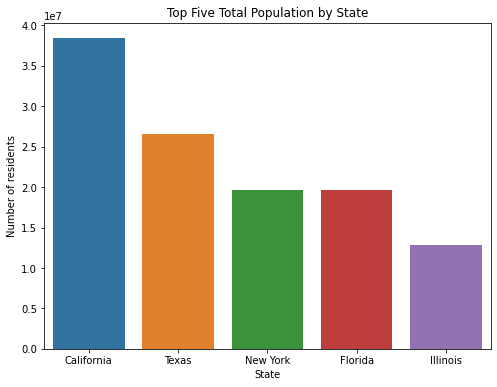

In [27]:
top_5_pop = us_census.sort_values('TotalPop', axis=0, ascending=False).head(5)

plt.figure(figsize=(8,6))
sns.barplot(x='State', y='TotalPop', data=top_5_pop)
plt.title('Top Five Total Population by State')
plt.ylabel('Number of residents')
plt.show()

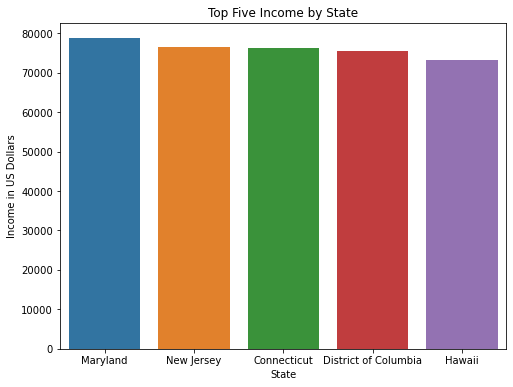

In [28]:
top_5_income = us_census.sort_values('Income', axis=0, ascending=False).head(5)

plt.figure(figsize=(8,6))
sns.barplot(x='State', y='Income', data=top_5_income)
plt.title('Top Five Income by State')
plt.ylabel('Income in US Dollars')
plt.show()

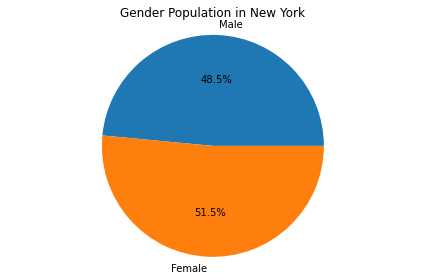

In [29]:
ny_census = us_census[us_census['State'] == 'New York'] # filter data for states of new york
ny_gender = ['Male', 'Female']
ny_gender_count = [int(ny_census.MalePop), int(ny_census.FemalePop)] # take data for male and female population

plt.pie(ny_gender_count, labels=ny_gender, autopct='%0.1f%%')
plt.title('Gender Population in New York')
plt.axis('equal')
plt.tight_layout()
plt.show()

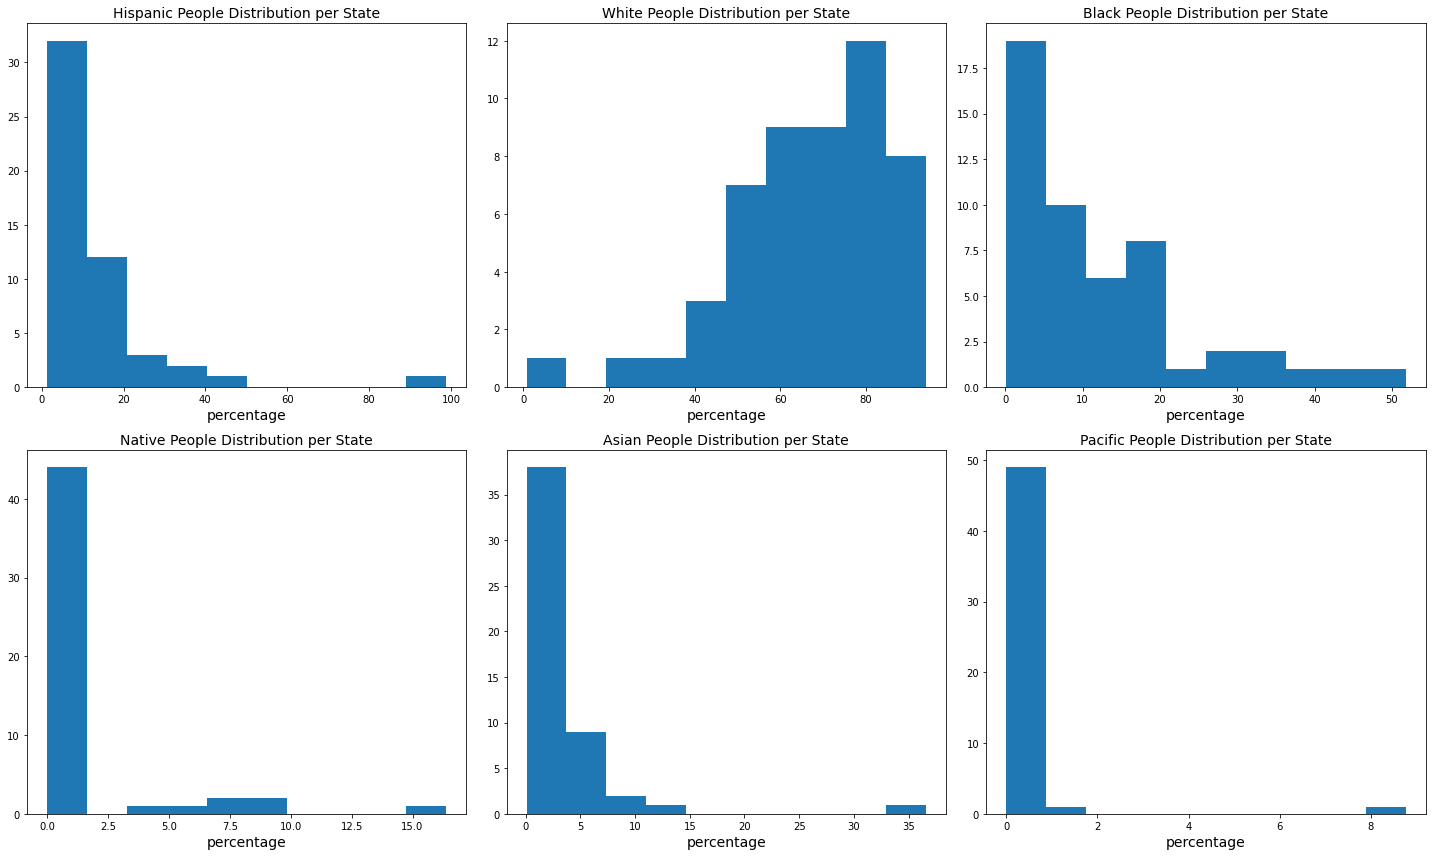

In [30]:
plt.figure(figsize=(20, 12))
for i in range(0, len(race_column)):
    plt.subplot(2, 3, i+1)
    plt.hist(race_column[i], data=us_census)
    plt.xlabel('percentage', fontsize=14)
    plt.title(f'{race_column[i]} People Distribution per State', fontsize=14)
    plt.tight_layout()

From races distribution we can see that white people histogram are skewed to the left, while the rest of the histograms are skewed to the right. It appears that white people are the most common races in United States.

There is some unique observation in Hispanic people histogram. The are bins that occupy the 90-100 percentage range. Let's check it.

In [31]:
us_census[us_census['Hispanic'] >= 90]

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,MalePop,FemalePop
46,Puerto Rico,3583073,98.89,0.77,0.09,0.0,0.08,0.0,20720.54,1713860,1869213.0


Hispanic people populates 98.89% of population in Puerto Rico! But wait, is this true? The value in this observation seems to be extreme, double-checking with data from other source will help us validate the accuracy of our data.

## Conclusion
***

Through cleaning this dataset, we can obtain informative findings that previously would be impossible. So far, what we have done for cleaning data are:

- Remove unused column
- Create new columns based on existing column
- Using regex to manipulate string data
- Convert data type to another type
- Check and handle missing values
- Check and drop duplicated data

In addition, we also analyze the data using visualization to find insight. Data cleaning is one of the most important part of data analytic process, and a data analyst should always spend some time to clean and validate their data.

Thank you for visiting my project! ✌